# Reach a Destination Point

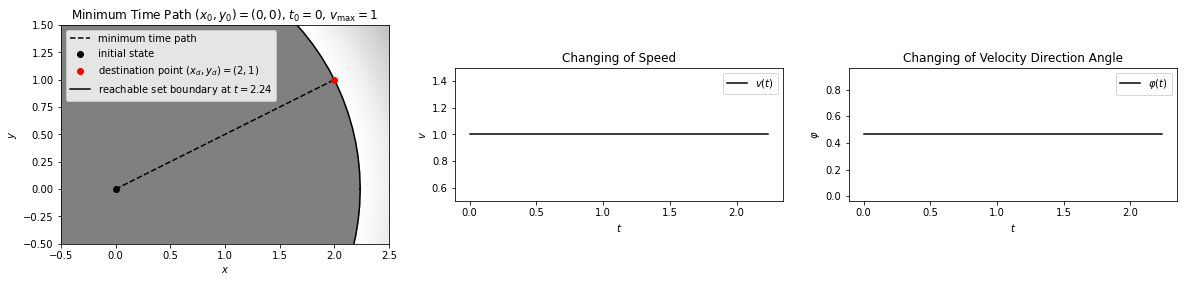

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mmcs.simple_motions.value import minimum_time
from mmcs.simple_motions.path import minimum_time_path
from mmcs.simple_motions.control import minimum_time_control
from mmcs.simple_motions.reachability import reachable_set, reachable_set_boundary, distance_to_reachable_set


x_dest, y_dest = 2, 1

t_dest = minimum_time(x_dest, y_dest)
t, x, y = minimum_time_path(x=x_dest, y=y_dest, n=50)
t, v, ϕ = minimum_time_control(x=x_dest, y=y_dest, n=50)
x_grid = np.linspace(x.min() - 0.5, x.max() + 0.5, 500)
y_grid = np.linspace(y.min() - 0.5, y.max() + 0.5, 500)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
R = reachable_set(t_dest, x_grid, y_grid)
B = reachable_set_boundary(t_dest, n=100)
dist_to_R = distance_to_reachable_set(t_dest, x_grid, y_grid)


fig, (xy, tv, tϕ) = plt.subplots(1, 3, figsize=(20, 20))

xy.plot(x, y, color='black', linestyle='dashed', label='minimum time path', zorder=1)
xy.scatter([x[0]], [y[0]], color='black', label=f'initial state', zorder=2)
xy.scatter([x_dest], [y_dest], color='red', zorder=2,
           label=rf'destination point $(x_{{d}}, y_{{d}}) = ({x_dest}, {y_dest})$')
xy.imshow(R, cmap="Greys", origin="lower", alpha=0.5, zorder=0,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(*B, color='black', label=f'reachable set boundary at $t = {t_dest:.2f}$', zorder=0)
xy.imshow(dist_to_R, cmap="Greys", origin="lower", alpha=0.5, zorder=-1,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.set_aspect('equal')
xy.set_xlabel('$x$')
xy.set_xlim((x_grid.min(), x_grid.max()))
xy.set_ylabel('$y$')
xy.set_ylim((y_grid.min(), y_grid.max()))
xy.set_title(rf'Minimum Time Path $(x_0, y_0) = ({0}, {0})$, $t_0 = {0}$, $v_{{\max}} = {1}$')
xy.legend()

tv.plot(t, v, color='black', label='$v(t)$')
tv.set_xlabel('$t$')
tv.set_ylabel('$v$')
tv.set_ylim((v[0] - 0.5, v[0] + 0.5))
tv.set_aspect('equal')
tv.set_title('Changing of Speed')
tv.legend()

tϕ.plot(t, ϕ, color='black', label=r'$\varphi(t)$')
tϕ.set_xlabel('$t$')
tϕ.set_ylabel(r'$\varphi$')
tϕ.set_ylim((ϕ[0] - 0.5, ϕ[0] + 0.5))
tϕ.set_aspect('equal')
tϕ.set_title('Changing of Velocity Direction Angle')
tϕ.legend()
plt.show()

# Intercept a Moving Target

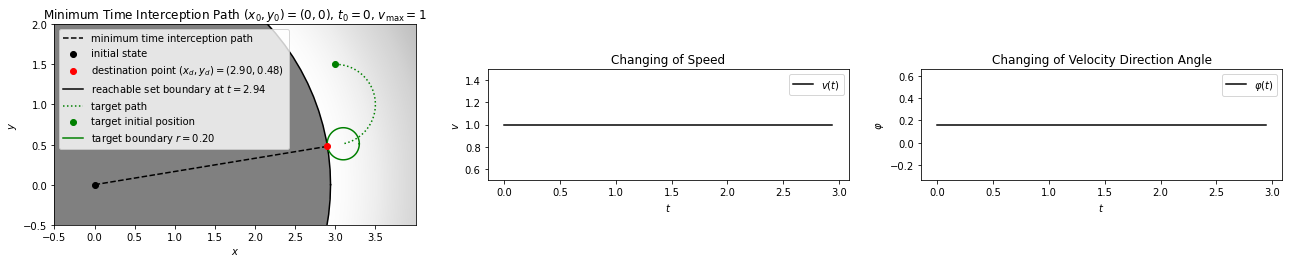

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mmcs.simple_motions.value import interception_minimum_time 
from mmcs.simple_motions.path import admissible_path 
from mmcs.simple_motions.control import admissible_control 
from mmcs.simple_motions.reachability import reachable_set, reachable_set_boundary, distance_to_reachable_set
from mmcs.simple_motions.reachability import nearest_point_to_reachable_set


def xt(t):
    return 3 + vt*np.sin(t)

def yt(t):
    return 1 + vt*np.cos(t)

r = 0.2
vt = 0.5

t_dest = interception_minimum_time(xt=xt, yt=yt, r=r, v=vt)
x_dest, y_dest = nearest_point_to_reachable_set(t=t_dest, x=xt(t_dest), y=yt(t_dest))
t, x, y = admissible_path(t=t_dest, x=x_dest, y=y_dest, n=50)
t, v, ϕ = admissible_control(t=t_dest, x=x_dest, y=y_dest, n=50)
x_grid = np.linspace(min(x.min(), xt(t).min()) - 0.5, max(x.max(), xt(t).max()) + 0.5, 500)
y_grid = np.linspace(min(y.min(), yt(t).min()) - 0.5, max(y.max(), yt(t).max()) + 0.5, 500)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
R = reachable_set(t_dest, x_grid, y_grid)
B = reachable_set_boundary(t_dest, n=100)
dist_to_R = distance_to_reachable_set(t_dest, x_grid, y_grid)


fig, (xy, tv, tϕ) = plt.subplots(1, 3, figsize=(22, 22))

xy.plot(x, y, color='black', linestyle='dashed', label='minimum time interception path', zorder=1)
xy.scatter([x[0]], [y[0]], color='black', label=f'initial state', zorder=2)
xy.scatter([x_dest], [y_dest], color='red', zorder=2,
           label=rf'destination point $(x_{{d}}, y_{{d}}) = ({x_dest:.2f}, {y_dest:.2f})$')
xy.imshow(R, cmap="Greys", origin="lower", alpha=0.5, zorder=0,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(*B, color='black', label=f'reachable set boundary at $t = {t_dest:.2f}$', zorder=0)
xy.imshow(dist_to_R, cmap="Greys", origin="lower", alpha=0.5, zorder=-1,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(xt(t), yt(t), color='green', linestyle='dotted', label='target path', zorder=1)
xy.scatter([xt(0)], [yt(0)], color='green', label=f'target initial position', zorder=2)
α = np.linspace(0, 2*np.pi, 100)
xy.plot(xt(t_dest) + r*np.cos(α), yt(t_dest) + r*np.sin(α), color='green',
        label=f'target boundary $r = {r:.2f}$', zorder=1)
xy.set_aspect('equal')
xy.set_xlabel('$x$')
xy.set_xlim((x_grid.min(), x_grid.max()))
xy.set_ylabel('$y$')
xy.set_ylim((y_grid.min(), y_grid.max()))
xy.set_title(rf'Minimum Time Interception Path $(x_0, y_0) = ({0}, {0})$, $t_0 = {0}$, $v_{{\max}} = {1}$')
xy.legend()

tv.plot(t, v, color='black', label='$v(t)$')
tv.set_xlabel('$t$')
tv.set_ylabel('$v$')
tv.set_ylim((v[0] - 0.5, v[0] + 0.5))
tv.set_aspect('equal')
tv.set_title('Changing of Speed')
tv.legend()

tϕ.plot(t, ϕ, color='black', label=r'$\varphi(t)$')
tϕ.set_xlabel('$t$')
tϕ.set_ylabel(r'$\varphi$')
tϕ.set_ylim((ϕ[0] - 0.5, ϕ[0] + 0.5))
tϕ.set_aspect('equal')
tϕ.set_title('Changing of Velocity Direction Angle')
tϕ.legend()
plt.show()